# Participant badge creator

```
# использовать для установки недостающих пакетов
import sys  
!{sys.executable} -m pip install --user fpdf
!{sys.executable} -m pip install --user pillow
!{sys.executable} -m pip install --user matplotlib
```

## Импорты

In [10]:
import time, os, sys, subprocess
start = time.time()

import matplotlib.font_manager as fm
import math 

from PIL import Image, ImageDraw, ImageFont, ImageOps
from fpdf import FPDF

## Константы и размеры

In [11]:
PIXEL_IN_MM = 2.8 # сколько пикселей в 1 миллиметре (2.8 оптимально)

BADGES_FOLDER = os.path.join('output', 'badges') # папка для сохранения файлов

pdf_name = os.path.join(BADGES_FOLDER, 'badges_binder.pdf') # имя .pdf-файла

In [12]:
badge_h = 55 # mm badge size (default 55)
badge_w = 90 # mm badge size (default 90)

bx_px = math.floor(badge_w*PIXEL_IN_MM)
by_px = math.floor(badge_h*PIXEL_IN_MM)

font = ImageFont.truetype(fm.findfont(fm.FontProperties(family='DejaVu Sans')), size = int(by_px*0.7)) # шрифт бейджей

print('Ширина бейджа в пикселях =', bx_px, '| Высота бейджа в пикселях =', by_px)

Ширина бейджа в пикселях = 251 | Высота бейджа в пикселях = 154


In [13]:
list_w = 210 #mm a4 list size (default 210)
list_h = 297 #mm a4 list size (default 297)

lw = math.floor(list_h/badge_w)
lh = math.floor(list_w/badge_h)
landscape_total = lw*lh

print('По ширине:', lw, '| По высоте:', lh)
print('Альбомная ориентация, вмещается бейджей: ', landscape_total)
print()

pw = math.floor(list_w/badge_w)
ph = math.floor(list_h/badge_h)
portrait_total = pw*ph

print('По ширине:', pw, '| По высоте:', ph)
print('Книжная ориентация, вмещается бейджей: ', portrait_total)
print()

if portrait_total > landscape_total:
    per_x = pw
    per_y = ph
    pdf = FPDF(orientation='P', format='A4') # параметры .pdf-файла
else:
    per_x = aw
    per_y = ah
    pdf = FPDF(orientation='L', format='A4') # параметры .pdf-файла

По ширине: 3 | По высоте: 3
Альбомная ориентация, вмещается бейджей:  9

По ширине: 2 | По высоте: 5
Книжная ориентация, вмещается бейджей:  10



## Функции

In [14]:
def badges_block(first_number):
    x = 0
    y = 0
    background = Image.new('RGB', (bx_px*per_x, by_px*per_y), color='white')
    #print(background.size)

    for i in range(first_number, first_number+10):
        if os.path.exists(os.path.join('sources', 'badge_pattern.png')):
            piece = Image.open(os.path.join('sources', 'badge_pattern.png'))
        elif os.path.exists('badge_pattern.png'):
            piece = Image.open('badge_pattern.png')
        else:
            piece = Image.new('RGB', (bx_px-2, by_px-2), color=(255,255,102)) # тут будет создаваться желтый фон

        number = ImageDraw.Draw(piece)
        w, h = number.textsize(str(i), font=font)
        number.text(((bx_px-w)/2,(((by_px-h)/2)-10)), str(i), font=font, fill='white')
        #number.text((50,30),'additional')

        piece = ImageOps.expand(piece, border=1, fill='black')
        background.paste(piece, (x, y))
        x += piece.size[0]
        print(piece.size)
        if x > bx_px:
            x = 0
            y += piece.size[1]

    return background

def blocks_list(pages):
    images_list = []
    for i in range(1, pages*10, 10):
        images_list.append(badges_block(i))
    return images_list

def saver(images_list):
    if os.path.exists(BADGES_FOLDER) == False:
        os.makedirs(BADGES_FOLDER)

    filenames = []
    for element in images_list:
        enum = str((images_list.index(element))*10+1) + '_' + str((images_list.index(element))*10+10)
        filename = os.path.join(BADGES_FOLDER, 'badges_' + enum + '.png')
        filenames.append(filename)
        try:
            element.save(filename)
        except:
            os.mkdir(BADGES_FOLDER)
            element.save(filename)

    return filenames
    
def create_pdf_binder(files_list, open, remove):
    pdf.add_page()
    for file in files_list:
        pdf.image(file)
    pdf.output(pdf_name)

    if open == True:
        try:
            os.startfile(pdf_name) # if sys.platform == "win32":
        except:
            opener = "open" if sys.platform == "darwin" else "xdg-open"
            subprocess.call([opener, pdf_name])

    if remove == True:
        for element in files_list:
            os.remove(element)

    print(os.path.abspath(pdf_name))

## Применение функций

### Тестовое создание блока бейджей

(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)


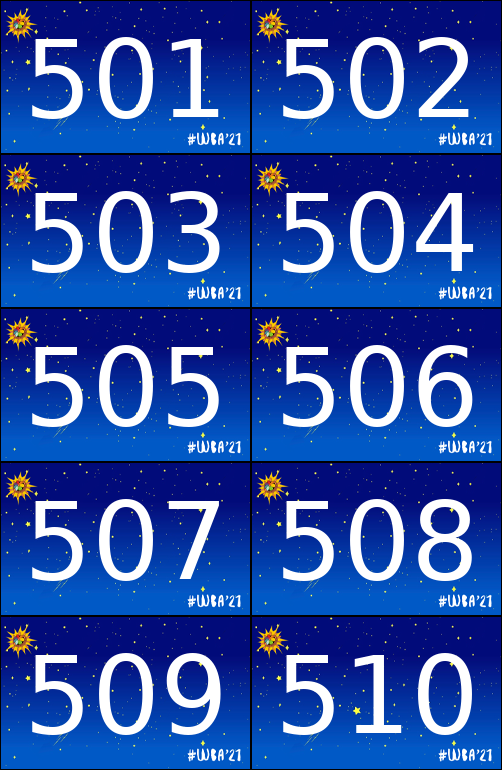

In [15]:
badges_block(501)

### Сохранение блоков бейджей в картинки

In [16]:
print(os.path.abspath(BADGES_FOLDER))
#print(os.path.join(os.getcwd(), BADGES_FOLDER))
print()

filenames_list = saver(blocks_list(3))
print(filenames_list)

/Users/sermakov/OneDrive/Repository/sebox/participant_badge_creator/output/badges

(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
(251, 154)
['output/badges/badges_1_10.png', 'output/badges/badges_11_20.png', 'output/badges/badges_21_30.png']


### Создание pdf-файла

In [17]:
# 1st True for open .pdf, 2nd for remove pngs

create_pdf_binder(filenames_list, True, False)

/Users/sermakov/OneDrive/Repository/sebox/participant_badge_creator/output/badges/badges_binder.pdf


In [18]:
end = time.time()
print('Время работы скрипта: ', round(end - start, 2), 'секунд')

Время работы скрипта:  2.14 секунд


## Список источников

1. https://egorovegor.ru/python-image-to-pdf-convert/
2. https://stackoverflow.com/questions/65676937/function-to-make-grid-of-images/65695715
3. https://stackoverflow.com/questions/37921295/python-pil-image-make-3x3-grid-from-sequence-images
4. https://python-scripts.com/create-pdf-pyfpdf